## The Relationship between Population and Traffic volume By Borough in NYC from 2010 to 2023

The goal 💡:  Knowing how the population in regions affect the traffic volume on it.


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('/content/drive/MyDrive/T5- final project/Automated_Traffic_Volume_Counts_20240902 (1).csv')

In [17]:
df.head(10)

,RequestID,Boro,Yr,M,D,HH,MM,Vol,SegmentID,WktGeom,street,fromSt,toSt,Direction
0,34178,Brooklyn,2022,1,4,16,0,111,189074,POINT (993228.5264971782 150600.75237618468),OCEAN PARKWAY,Dead End,Ocean View Avenue,NB
1,34178,Brooklyn,2022,1,4,16,15,98,189074,POINT (993228.5264971782 150600.75237618468),OCEAN PARKWAY,Dead End,Ocean View Avenue,NB
2,34178,Brooklyn,2022,1,4,16,30,122,189074,POINT (993228.5264971782 150600.75237618468),OCEAN PARKWAY,Dead End,Ocean View Avenue,NB
3,34178,Brooklyn,2022,1,4,16,45,102,189074,POINT (993228.5264971782 150600.75237618468),OCEAN PARKWAY,Dead End,Ocean View Avenue,NB
4,34178,Brooklyn,2022,1,4,17,0,156,189074,POINT (993228.5264971782 150600.75237618468),OCEAN PARKWAY,Dead End,Ocean View Avenue,NB
5,34178,Brooklyn,2022,1,4,17,15,138,189074,POINT (993228.5264971782 150600.75237618468),OCEAN PARKWAY,Dead End,Ocean View Avenue,NB
6,34178,Brooklyn,2022,1,4,17,30,98,189074,POINT (993228.5264971782 150600.75237618468),OCEAN PARKWAY,Dead End,Ocean View Avenue,NB
7,34178,Brooklyn,2022,1,4,17,45,96,189074,POINT (993228.5264971782 150600.75237618468),OCEAN PARKWAY,Dead End,Ocean View Avenue,NB
8,34178,Brooklyn,2022,1,4,18,0,106,189074,POINT (993228.5264971782 150600.75237618468),OCEAN PARKWAY,Dead End,Ocean View Avenue,NB
9,34178,Brooklyn,2022,1,4,18,15,93,189074,POINT (993228.5264971782 150600.75237618468),OCEAN PARKWAY,Dead End,Ocean View Avenue,NB


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1673725 entries, 0 to 1673724
Data columns (total 14 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   RequestID  1673725 non-null  int64 
 1   Boro       1673725 non-null  object
 2   Yr         1673725 non-null  int64 
 3   M          1673725 non-null  int64 
 4   D          1673725 non-null  int64 
 5   HH         1673725 non-null  int64 
 6   MM         1673725 non-null  int64 
 7   Vol        1673725 non-null  int64 
 8   SegmentID  1673725 non-null  int64 
 9   WktGeom    1673725 non-null  object
 10  street     1673725 non-null  object
 11  fromSt     1673725 non-null  object
 12  toSt       1672479 non-null  object
 13  Direction  1673725 non-null  object
dtypes: int64(8), object(6)
memory usage: 178.8+ MB


In [19]:
df.isnull().sum()

,0
RequestID,0
Boro,0
Yr,0
M,0
D,0
HH,0
MM,0
Vol,0
SegmentID,0
WktGeom,0


In [20]:
#remove unnecessary columns

df = df.drop(['RequestID', 'M', 'D', 'HH', 'MM', 'SegmentID', 'WktGeom', 'street', 'fromSt', 'toSt', 'Direction'], axis=1)

In [21]:
df.sample(5)

,Boro,Yr,Vol
398885,Brooklyn,2010,36
316149,Queens,2016,91
888313,Queens,2011,30
368858,Brooklyn,2011,162
1563538,Bronx,2017,43


In [22]:
df['Boro'].value_counts()

,count
Boro,
Queens,521477
Brooklyn,464011
Manhattan,293985
Bronx,272500
Staten Island,121752


In [23]:
#calculate the average of the year in this regions

# Calculate the average volume for each region and year
average_volume_by_region_year = df.groupby(['Boro', 'Yr'])['Vol'].mean().reset_index()

# Display the result
print(average_volume_by_region_year)


             Boro    Yr         Vol
0           Bronx  2007  978.520904
1           Bronx  2008  720.951166
2           Bronx  2009   69.058889
3           Bronx  2010  119.102899
4           Bronx  2011   62.585884
..            ...   ...         ...
82  Staten Island  2019   99.864333
83  Staten Island  2020   99.568056
84  Staten Island  2021  173.459566
85  Staten Island  2022  199.814079
86  Staten Island  2023   71.755011

[87 rows x 3 columns]


In [24]:
# Filter out rows with years less than 2010
average_volume_by_region_year = average_volume_by_region_year[average_volume_by_region_year['Yr'] >= 2010]

# Display the updated result
print(average_volume_by_region_year)


             Boro    Yr         Vol
3           Bronx  2010  119.102899
4           Bronx  2011   62.585884
5           Bronx  2012  153.320389
6           Bronx  2013  127.991634
7           Bronx  2014  171.196088
..            ...   ...         ...
82  Staten Island  2019   99.864333
83  Staten Island  2020   99.568056
84  Staten Island  2021  173.459566
85  Staten Island  2022  199.814079
86  Staten Island  2023   71.755011

[70 rows x 3 columns]


#### now i will add the population dataset

In [25]:
df2 = pd.read_csv('/content/drive/MyDrive/T5- final project/NYC_Population_Density_By_Borough_from_2010_to_2023.csv')

In [26]:
df2.head()

,Borough,Year,Population,Area (sq miles),Population Density (people per sq mile)
0,Manhattan,2010,1619090,22.82,70950.482033
1,Brooklyn,2010,2504700,69.39,36095.979248
2,Queens,2010,2230722,108.70,20521.821527
3,Bronx,2010,1385108,42.20,32822.464455
4,Staten Island,2010,468730,57.50,8151.826087


In [27]:
df2 = df2.rename(columns={'Borough': 'Boro'})
df2 = df2.rename(columns={'Year': 'Yr'})

In [28]:
# Perform a full outer join
population_df = pd.merge(average_volume_by_region_year, df2, on=['Boro', 'Yr'], how='outer')

population_df

,Boro,Yr,Vol,Population,Area (sq miles),Population Density (people per sq mile)
0,Bronx,2010,119.102899,1385108,42.2,32822.464455
1,Bronx,2011,62.585884,1395796,42.2,33075.734597
2,Bronx,2012,153.320389,1408474,42.2,33376.161137
3,Bronx,2013,127.991634,1421336,42.2,33680.947867
4,Bronx,2014,171.196088,1432132,42.2,33936.777251
...,...,...,...,...,...,...
65,Staten Island,2019,99.864333,485080,57.5,8436.173913
66,Staten Island,2020,99.568056,487155,57.5,8472.260870
67,Staten Island,2021,173.459566,486460,57.5,8460.173913
68,Staten Island,2022,199.814079,487003,57.5,8469.617391


In [29]:
#sort population_df by Yr to make it time series
population_df = population_df.sort_values(by=['Yr']).reset_index()
population_df

,index,Boro,Yr,Vol,Population,Area (sq miles),Population Density (people per sq mile)
0,0,Bronx,2010,119.102899,1385108,42.20,32822.464455
1,28,Manhattan,2010,143.080870,1619090,22.82,70950.482033
2,42,Queens,2010,105.386883,2230722,108.70,20521.821527
3,14,Brooklyn,2010,81.272843,2504700,69.39,36095.979248
4,56,Staten Island,2010,23.911612,468730,57.50,8151.826087
...,...,...,...,...,...,...,...
65,55,Queens,2023,177.924003,2364523,108.70,21752.741490
66,27,Brooklyn,2023,82.951123,2689813,69.39,38763.697939
67,13,Bronx,2023,94.033106,1490386,42.20,35317.203791
68,41,Manhattan,2023,81.414885,1749853,22.82,76680.674847


In [30]:
population_df = population_df.drop('index', axis=1)

In [31]:
population_df

,Boro,Yr,Vol,Population,Area (sq miles),Population Density (people per sq mile)
0,Bronx,2010,119.102899,1385108,42.20,32822.464455
1,Manhattan,2010,143.080870,1619090,22.82,70950.482033
2,Queens,2010,105.386883,2230722,108.70,20521.821527
3,Brooklyn,2010,81.272843,2504700,69.39,36095.979248
4,Staten Island,2010,23.911612,468730,57.50,8151.826087
...,...,...,...,...,...,...
65,Queens,2023,177.924003,2364523,108.70,21752.741490
66,Brooklyn,2023,82.951123,2689813,69.39,38763.697939
67,Bronx,2023,94.033106,1490386,42.20,35317.203791
68,Manhattan,2023,81.414885,1749853,22.82,76680.674847


In [32]:
population_df['Boro'].value_counts()

,count
Boro,
Bronx,14
Manhattan,14
Queens,14
Brooklyn,14
Staten Island,14


In [33]:
bronx_df = population_df[population_df['Boro'] == 'Bronx']
bronx_df

,Boro,Yr,Vol,Population,Area (sq miles),Population Density (people per sq mile)
0,Bronx,2010,119.102899,1385108,42.2,32822.464455
9,Bronx,2011,62.585884,1395796,42.2,33075.734597
11,Bronx,2012,153.320389,1408474,42.2,33376.161137
16,Bronx,2013,127.991634,1421336,42.2,33680.947867
22,Bronx,2014,171.196088,1432132,42.2,33936.777251
26,Bronx,2015,122.842667,1441562,42.2,34160.236967
33,Bronx,2016,58.748972,1450018,42.2,34360.616114
37,Bronx,2017,134.583821,1459725,42.2,34590.639810
40,Bronx,2018,140.445265,1468971,42.2,34809.739336
49,Bronx,2019,85.803646,1476287,42.2,34983.104265


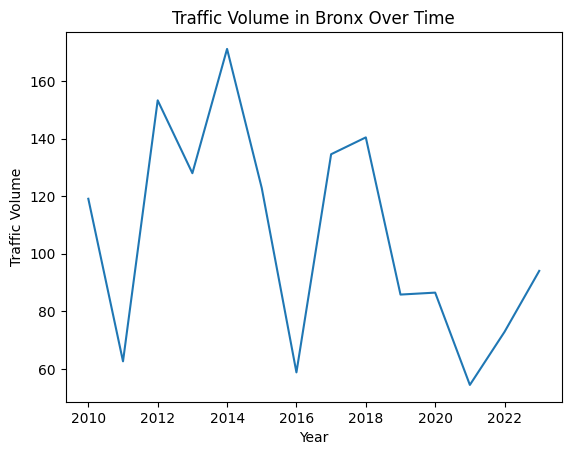

In [34]:
import matplotlib.pyplot as plt

plt.plot(bronx_df['Yr'], bronx_df['Vol'])

plt.xlabel('Year')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume in Bronx Over Time')
plt.show()

In [35]:
Manhattan_df = population_df[population_df['Boro'] == 'Manhattan']
Manhattan_df

,Boro,Yr,Vol,Population,Area (sq miles),Population Density (people per sq mile)
1,Manhattan,2010,143.080870,1619090,22.82,70950.482033
5,Manhattan,2011,117.008129,1636268,22.82,71703.242770
13,Manhattan,2012,172.302266,1654914,22.82,72520.333041
18,Manhattan,2013,160.319187,1672950,22.82,73310.692375
23,Manhattan,2014,127.244643,1686202,22.82,73891.411043
27,Manhattan,2015,108.715085,1694251,22.82,74244.127958
32,Manhattan,2016,135.143314,1701224,22.82,74549.693252
36,Manhattan,2017,136.034453,1711586,22.82,75003.768624
41,Manhattan,2018,222.031723,1721596,22.82,75442.418931
47,Manhattan,2019,111.506344,1732625,22.82,75925.723050


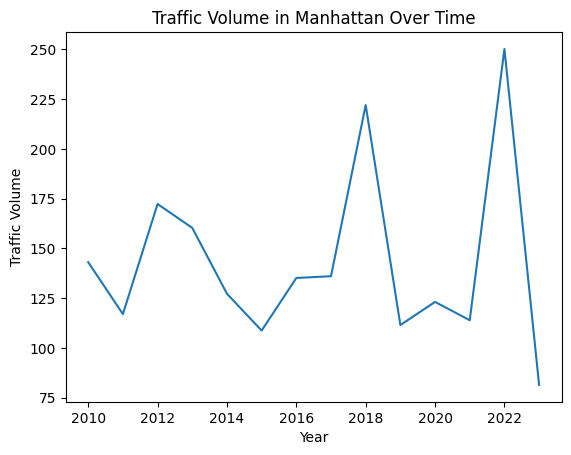

In [36]:
plt.plot(Manhattan_df['Yr'], Manhattan_df['Vol'])

plt.xlabel('Year')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume in Manhattan Over Time')
plt.show()

In [37]:
Queens_df = population_df[population_df['Boro'] == 'Queens']
Queens_df

,Boro,Yr,Vol,Population,Area (sq miles),Population Density (people per sq mile)
2,Queens,2010,105.386883,2230722,108.7,20521.821527
6,Queens,2011,61.873008,2246466,108.7,20666.660534
12,Queens,2012,92.834255,2261608,108.7,20805.961362
17,Queens,2013,106.429821,2278906,108.7,20965.096596
21,Queens,2014,95.442049,2295674,108.7,21119.356026
29,Queens,2015,110.630423,2309563,108.7,21247.129715
30,Queens,2016,145.954230,2321580,108.7,21357.681693
39,Queens,2017,107.926739,2333054,108.7,21463.238270
42,Queens,2018,67.517355,2343847,108.7,21562.529899
45,Queens,2019,105.110243,2353174,108.7,21648.334867


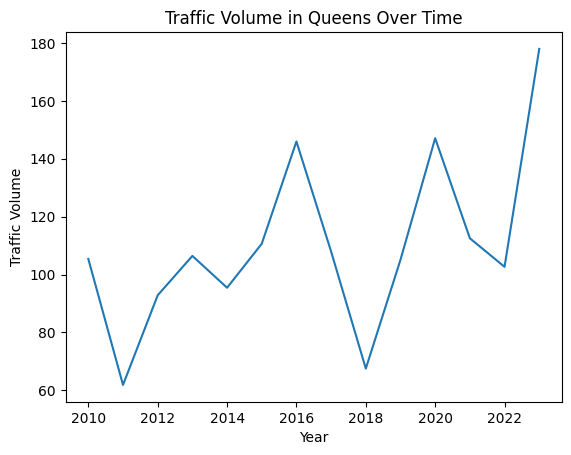

In [38]:
plt.plot(Queens_df['Yr'], Queens_df['Vol'])

plt.xlabel('Year')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume in Queens Over Time')
plt.show()

In [39]:
Brooklyn_df = population_df[population_df['Boro'] == 'Brooklyn']
Brooklyn_df

,Boro,Yr,Vol,Population,Area (sq miles),Population Density (people per sq mile)
3,Brooklyn,2010,81.272843,2504700,69.39,36095.979248
8,Brooklyn,2011,90.002918,2527584,69.39,36425.767402
14,Brooklyn,2012,71.257843,2552911,69.39,36790.762358
19,Brooklyn,2013,85.898520,2577474,69.39,37144.747082
24,Brooklyn,2014,76.406193,2600475,69.39,37476.221358
25,Brooklyn,2015,113.131446,2621268,69.39,37775.875486
34,Brooklyn,2016,88.614968,2637502,69.39,38009.828506
35,Brooklyn,2017,64.217532,2650168,69.39,38192.362012
44,Brooklyn,2018,56.804779,2663973,69.39,38391.309987
48,Brooklyn,2019,170.357397,2679155,69.39,38610.102320


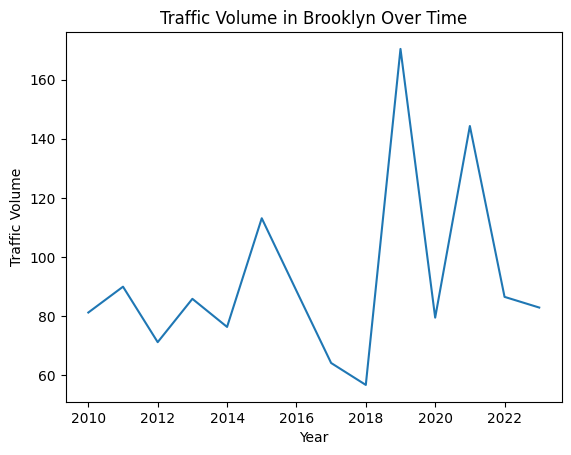

In [40]:
plt.plot(Brooklyn_df['Yr'], Brooklyn_df['Vol'])

plt.xlabel('Year')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume in Brooklyn Over Time')
plt.show()

In [41]:
StatenIsland_df = population_df[population_df['Boro'] == 'Staten Island']
StatenIsland_df

,Boro,Yr,Vol,Population,Area (sq miles),Population Density (people per sq mile)
4,Staten Island,2010,23.911612,468730,57.5,8151.826087
7,Staten Island,2011,72.439461,470728,57.5,8186.573913
10,Staten Island,2012,62.595384,472621,57.5,8219.495652
15,Staten Island,2013,48.007077,474558,57.5,8253.182609
20,Staten Island,2014,66.758088,476179,57.5,8281.373913
28,Staten Island,2015,145.023821,477611,57.5,8306.278261
31,Staten Island,2016,78.527980,479458,57.5,8338.400000
38,Staten Island,2017,129.071478,481524,57.5,8374.330435
43,Staten Island,2018,162.063246,483204,57.5,8403.547826
46,Staten Island,2019,99.864333,485080,57.5,8436.173913


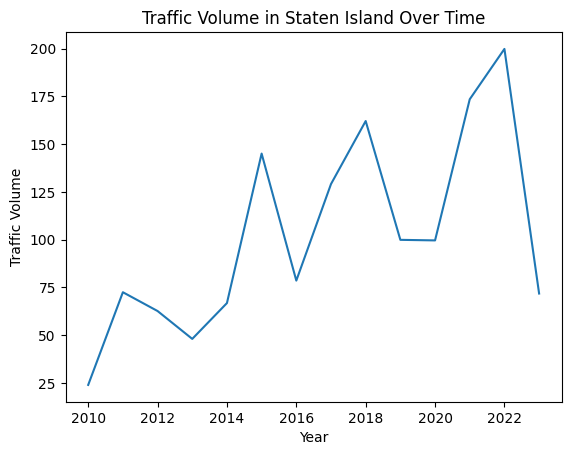

In [42]:
plt.plot(StatenIsland_df['Yr'], StatenIsland_df['Vol'])

plt.xlabel('Year')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume in Staten Island Over Time')
plt.show()

### All Boroughs togather

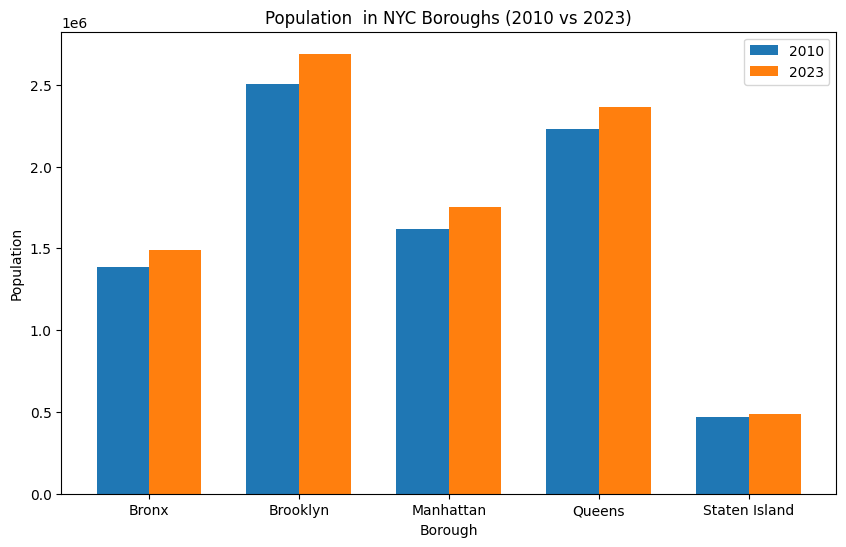

In [43]:
#The Population different from 2010 and 2023

population_2010 = population_df[population_df['Yr'] == 2010]
population_2023 = population_df[population_df['Yr'] == 2023]

pop_2010 = population_2010.groupby('Boro')['Population'].sum()
pop_2023 = population_2023.groupby('Boro')['Population'].sum()

plt.figure(figsize=(10, 6))
width = 0.35
x = pop_2010.index
plt.bar(x, pop_2010.values, width, label='2010')
plt.bar([i + width for i in range(len(x))], pop_2023.values, width, label='2023')

plt.xlabel('Borough')
plt.ylabel('Population')
plt.title('Population  in NYC Boroughs (2010 vs 2023)')
plt.xticks([i + width/2 for i in range(len(x))], x)
plt.legend()
plt.show()


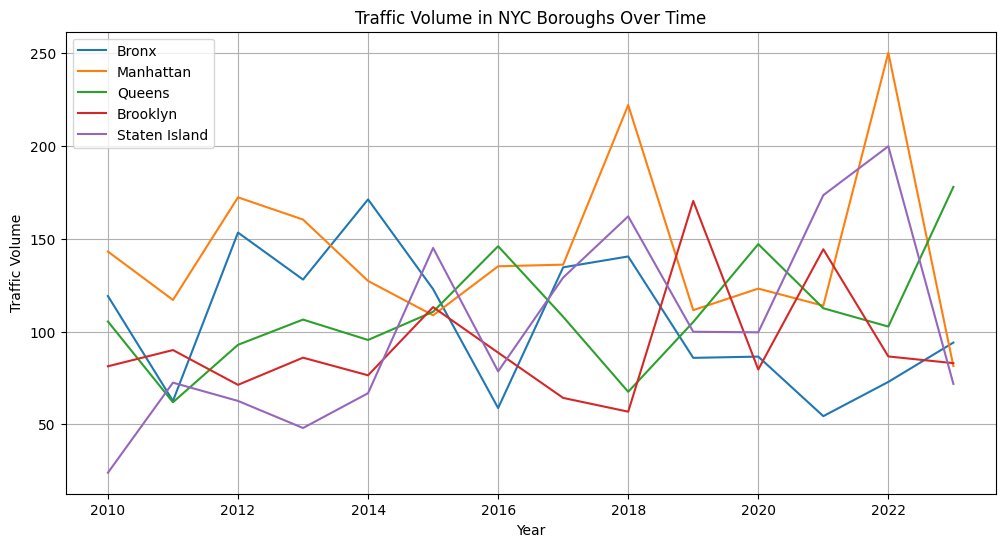

In [44]:
plt.figure(figsize=(12, 6))

plt.plot(bronx_df['Yr'], bronx_df['Vol'], label='Bronx')
plt.plot(Manhattan_df['Yr'], Manhattan_df['Vol'], label='Manhattan')
plt.plot(Queens_df['Yr'], Queens_df['Vol'], label='Queens')
plt.plot(Brooklyn_df['Yr'], Brooklyn_df['Vol'], label='Brooklyn')
plt.plot(StatenIsland_df['Yr'], StatenIsland_df['Vol'], label='Staten Island')

plt.xlabel('Year')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume in NYC Boroughs Over Time')
plt.legend()
plt.grid(True)
plt.show()

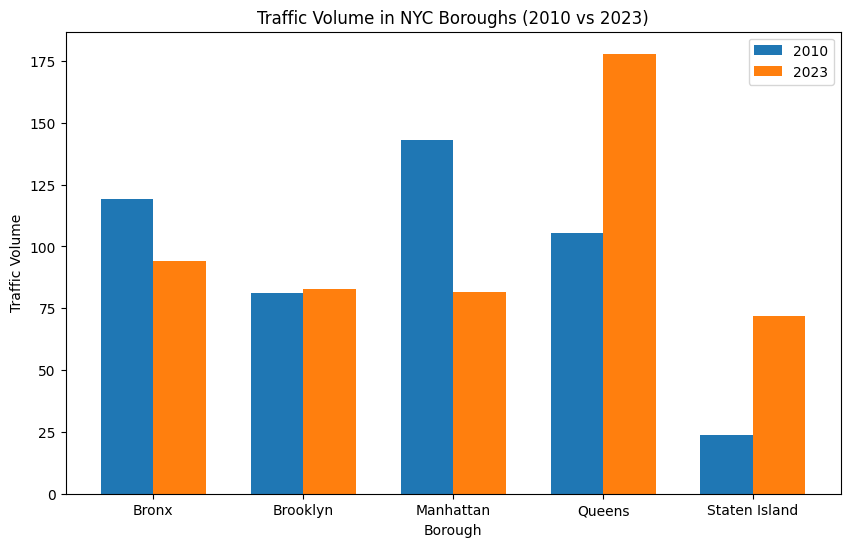

In [45]:
#The Traffic Volume different from 2010 and 2023

vol_2010 = population_df[population_df['Yr'] == 2010]
vol_2023 = population_df[population_df['Yr'] == 2023]

vol_2010 = vol_2010.groupby('Boro')['Vol'].sum()
vol_2023 = vol_2023.groupby('Boro')['Vol'].sum()

plt.figure(figsize=(10, 6))
width = 0.35
x = vol_2010.index
plt.bar(x, vol_2010.values, width, label='2010')
plt.bar([i + width for i in range(len(x))], vol_2023.values, width, label='2023')

plt.xlabel('Borough')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume in NYC Boroughs (2010 vs 2023)')
plt.xticks([i + width/2 for i in range(len(x))], x)
plt.legend()
plt.show()


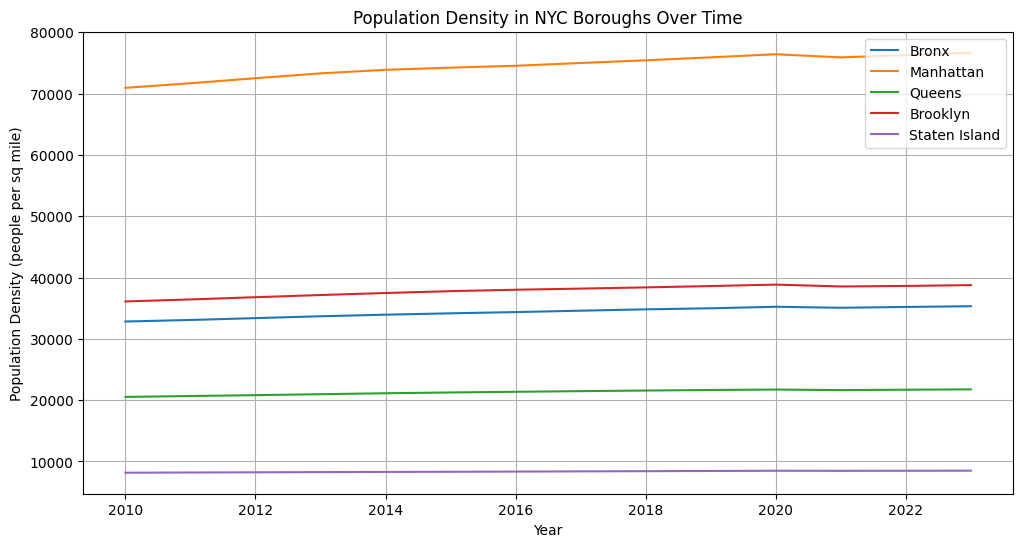

In [60]:
# Population Density over Years in each Boro
plt.figure(figsize=(12, 6))

for boro in population_df['Boro'].unique():
  boro_df = population_df[population_df['Boro'] == boro]
  plt.plot(boro_df['Yr'], boro_df['Population Density (people per sq mile)'], label=boro)

plt.xlabel('Year')
plt.ylabel('Population Density (people per sq mile)')
plt.title('Population Density in NYC Boroughs Over Time')
plt.legend()
plt.grid(True)
plt.show()


if there is any comment or improvement ideas.  plz, let me know :)